In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split    

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [11]:
iris = datasets.load_iris()


iris_df = pd.DataFrame(np.column_stack((iris.data, iris.target)), columns=iris.feature_names + ['target'])
#iris_df["target_names"] = iris_df["target"].map(lambda i : iris.target_names[i]) # added target_names for visiblity
#or
iris_df["target_names"] = iris_df.target.map(dict(enumerate(iris.target_names)))

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [12]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

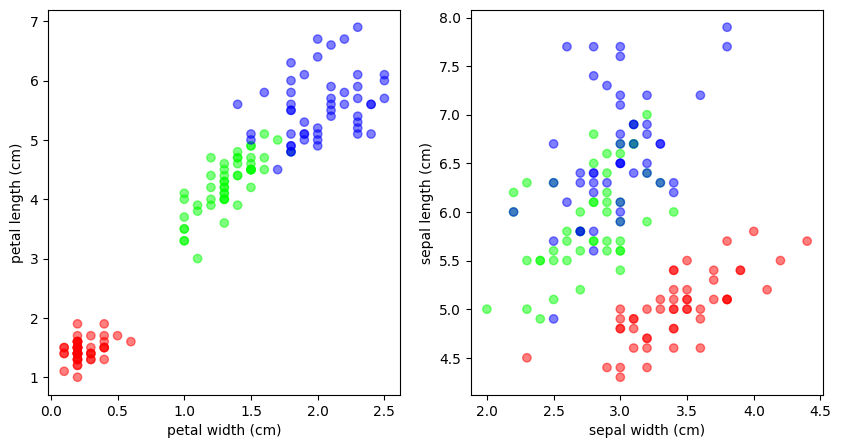

In [14]:
# Plot the original data

feature1 = 'petal width (cm)'
feature2 = 'petal length (cm)'
feature3 = 'sepal width (cm)'
feature4 = 'sepal length (cm)'

fig, (ax, bx) = plt.subplots(1,2, figsize=(10,5))
ax.scatter(iris_df[feature1], iris_df[feature2], c=iris_df.target, cmap=cmap, alpha=.5)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

bx.scatter(iris_df[feature3], iris_df[feature4], c=iris_df.target, cmap=cmap, alpha=.5)
bx.set_xlabel(feature3)
bx.set_ylabel(feature4)
plt.show()

Text(0, 0.5, 'sepal length (cm)')

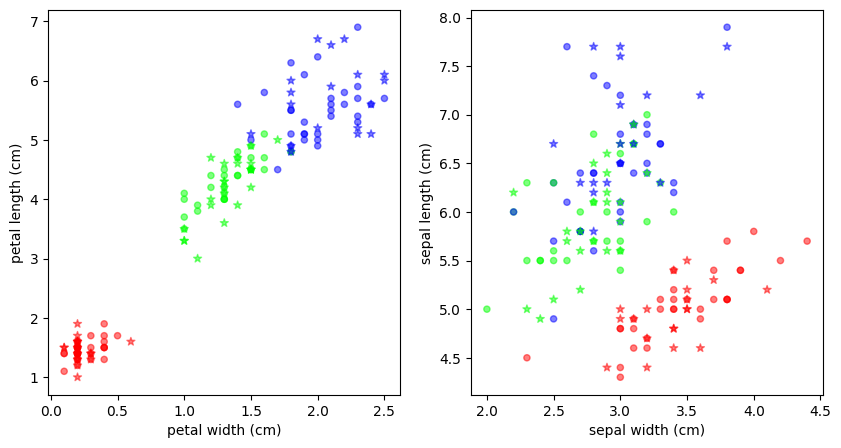

In [15]:
train_X, test_X, train_y, test_y  =train_test_split(iris.data, iris.target, test_size=0.4, random_state=1234)

fig, (ax, bx) = plt.subplots(1,2, figsize=(10,5))
ax.scatter(train_X[:,3], train_X[:,2], c=train_y, cmap=cmap, alpha=.5, marker='o', s=20)
ax.scatter(test_X[:,3], test_X[:,2], c=test_y, cmap=cmap, alpha=.5, marker='*')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

bx.scatter(train_X[:,1], train_X[:,0], c=train_y, cmap=cmap, alpha=.5, marker='o', s=20)
bx.scatter(test_X[:,1], test_X[:,0], c=test_y, cmap=cmap, alpha=.5, marker='*')
bx.set_xlabel(feature3)
bx.set_ylabel(feature4)

In [16]:
from collections import Counter

fi_test = []
fi_5near_pos = []
fi_3near_pos = []

def eculidean_distance(x,y):
    # # pythagram formula to cal distance c**2 = (a + b)**2 refer: https://www.youtube.com/watch?v=KnEgt5V2H1U 
    d = np.sqrt(np.sum((x - y) **2))
    return d
    
def predict(a, i):
   distance = [eculidean_distance(a,b) for b in train_X] # distance each test set from training set 
   sortPos = np.argsort(distance)[:3]
   ky = [train_y[p] for p in sortPos] # fetch train target based first 3 near train feature of test set
   p = Counter(ky).most_common(1)[0][0]
   if(p != test_y[i]):
       print("false prediction acc =", p, "expected =", test_y[i])
       fi_test.append(i)
       fi_5near_pos.append(np.argsort(distance)[:5]) # play k value with 3 and 5 and observe below plot. And 5 giving more accurate with test result
       fi_3near_pos.append(np.argsort(distance)[:3]) 
   return p



p = np.array([predict(tx, i) for i, tx in enumerate(test_X)])


print("Below said number times values predicted correct")
acc = np.array(p == test_y)
print(acc)
s_count = np.sum(acc)
print(s_count, "times correct. ratio", s_count/len(test_y))



false prediction acc = 2 expected = 1
false prediction acc = 1 expected = 2
Below said number times values predicted correct
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
58 times correct. ratio 0.9666666666666667


In [17]:
# will see debug 2 false count reasons
# and check same diff pattern https://github.com/codebasics/py/blob/master/ML/17_knn_classification/knn_classification_tutorial.ipynb

In [18]:
train_X

array([[5.1, 3.4, 1.5, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 2.5, 5. , 2. ],
       [6.5, 3.2, 5.1, 2. ],
       [5.1, 3.7, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.6, 5.6, 1.4],
       [6.7, 3.3, 5.7, 2.5],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 3.6, 1.4, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.4, 3.7, 1.5, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.9, 4.5, 1.5],
       [5.6, 3. , 4.1, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5.8, 2.7, 4.1, 1. ],
       [5. , 3.4, 1.5, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.4, 2.8, 5.6, 2.2],
       [6. , 3. , 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [5.5, 2.6, 4.4, 1.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [5.9, 3

Text(0, 0.5, 'sepal length (cm)')

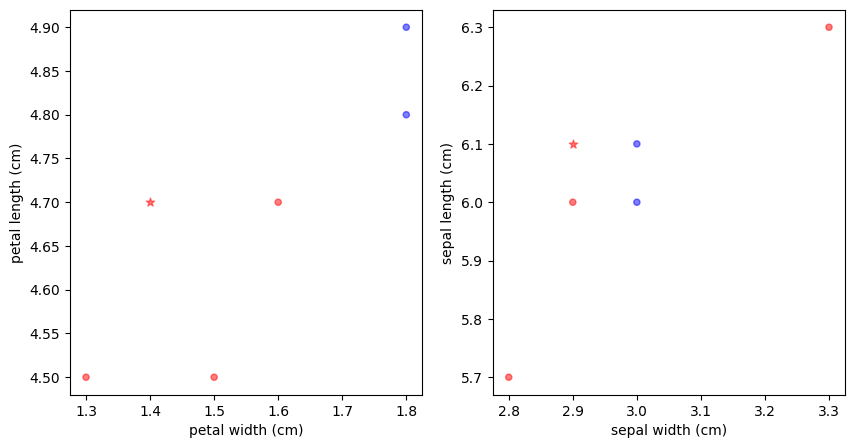

In [19]:
fig, (ax, bx) = plt.subplots(1,2, figsize=(10,5))
ax.scatter(train_X[fi_5near_pos[0],3], train_X[fi_5near_pos[0],2], c=train_y[fi_5near_pos[0]], cmap=cmap, alpha=.5, marker='o', s=20)
ax.scatter(test_X[fi_test[0],3], test_X[fi_test[0],2], c=test_y[fi_test[0]], cmap=cmap, alpha=.5, marker='*', s=40)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

bx.scatter(train_X[fi_5near_pos[0],1], train_X[fi_5near_pos[0],0], c=train_y[fi_5near_pos[0]], cmap=cmap, alpha=.5, marker='o', s=20)
bx.scatter(test_X[fi_test[0],1], test_X[fi_test[0],0], c=test_y[fi_test[0]], cmap=cmap, alpha=.5, marker='*', s=40)
bx.set_xlabel(feature3)
bx.set_ylabel(feature4)

Text(0, 0.5, 'sepal length (cm)')

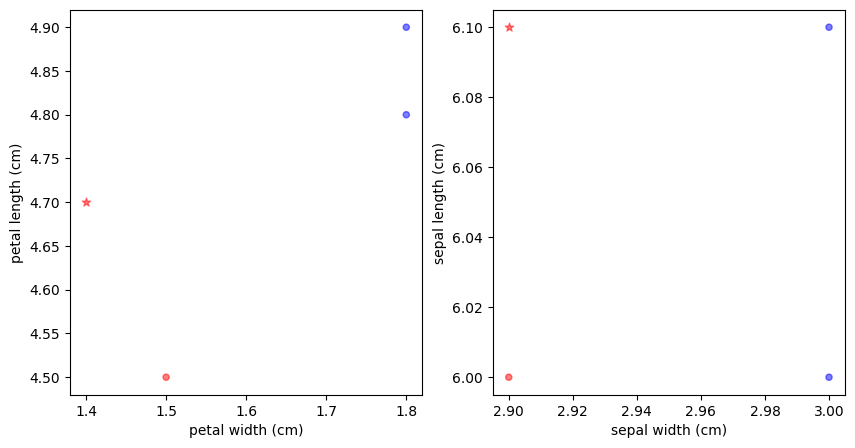

In [20]:
fig, (ax, bx) = plt.subplots(1,2, figsize=(10,5))
ax.scatter(train_X[fi_3near_pos[0],3], train_X[fi_3near_pos[0],2], c=train_y[fi_3near_pos[0]], cmap=cmap, alpha=.5, marker='o', s=20)
ax.scatter(test_X[fi_test[0],3], test_X[fi_test[0],2], c=test_y[fi_test[0]], cmap=cmap, alpha=.5, marker='*', s=40)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

bx.scatter(train_X[fi_3near_pos[0],1], train_X[fi_3near_pos[0],0], c=train_y[fi_3near_pos[0]], cmap=cmap, alpha=.5, marker='o', s=20)
bx.scatter(test_X[fi_test[0],1], test_X[fi_test[0],0], c=test_y[fi_test[0]], cmap=cmap, alpha=.5, marker='*', s=40)
bx.set_xlabel(feature3)
bx.set_ylabel(feature4)